In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
import re

In [2]:
data=requests.get('https://raw.githubusercontent.com/robert456456456456/Web_server_log_parser/master/devops.log').text.split('\n')

In [3]:
type(data)

list

In [4]:
def column_name(x):
    return {"User Address":x.group(1),"Date/Time":x.group(2),"GMT Offset":x.group(3),"Action":x.group(4),"Return Code":x.group(5),"Size":x.group(6)}

In [5]:
def logParser(data):
    #Regex code to seperate out necessary elements
    regex = r'(.*?) .*? .*? \[(.*?)-(\d{0,9})\].*?.*?\".*?.*?(.*?\/.*?.*?\/.*?\/.*?\/.*?\/.*?\/.*?\d{0,9}\.\d{0,9}).*?\".(\d{0,9}).*?.(\d{0,9})'
    search = re.compile(regex).search
    matches = (search(line) for line in data)
    return [column_name(x) for x in matches if x]

In [6]:
df=pd.DataFrame(logParser(data))

In [7]:
df.head()

,User Address,Date/Time,GMT Offset,Action,Return Code,Size
0,64.242.88.10,07/Mar/2004:16:05:49,0800,GET /twiki/bin/edit/Main/Double_bounce_sender?...,401,12846
1,64.242.88.10,07/Mar/2004:16:06:51,0800,GET /twiki/bin/rdiff/TWiki/NewUserTemplate?rev...,200,4523
2,64.242.88.10,07/Mar/2004:16:11:58,0800,GET /twiki/bin/view/TWiki/WikiSyntax HTTP/1.1,200,7352
3,64.242.88.10,07/Mar/2004:16:20:55,0800,GET /twiki/bin/view/Main/DCCAndPostFix HTTP/1.1,200,5253
4,64.242.88.10,07/Mar/2004:16:23:12,0800,GET /twiki/bin/oops/TWiki/AppendixFileSystem?t...,200,11382


In [8]:
df.tail()

,User Address,Date/Time,GMT Offset,Action,Return Code,Size
763,145.253.208.9,12/Mar/2004:05:44:50,0800,GET /twiki/bin/view/Main/DCC HTTP/1.1,200,4396
764,145.253.208.9,12/Mar/2004:05:44:51,0800,GET /twiki/pub/TWiki/TWikiLogos/twikiRobot46x5...,304,
765,lj1223.inktomisearch.com,12/Mar/2004:09:12:02,0800,GET /twiki/bin/oops/Main/Mi HTTP/1.0,200,209
766,67.131.107.5,12/Mar/2004:11:39:25,0800,GET /twiki/bin/view/Main/WebHome HTTP/1.1,200,10419
767,67.131.107.5,12/Mar/2004:11:39:31,0800,GET /twiki/pub/TWiki/TWikiLogos/twikiRobot46x5...,200,2877


In [9]:
most_visited_users=df['User Address'].value_counts().head(5)
most_visited_users


64.242.88.10                   395
cr020r01-3.sac.overture.com     43
mail.geovariances.fr            23
ogw.netinfo.bg                  19
207.195.59.160                  19
Name: User Address, dtype: int64

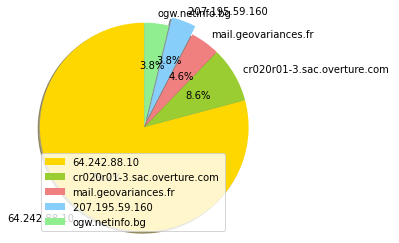

In [10]:
import matplotlib.pyplot as plt 

count=[]
for user in most_visited_users:
    count.append(user)
visitors=['64.242.88.10','cr020r01-3.sac.overture.com ','mail.geovariances.fr','207.195.59.160 ','ogw.netinfo.bg'] 
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen'] 

plt.pie(count,labels = visitors, colors=colors, 
    startangle=90, shadow = True, explode = (0,0, 0, 0.1, 0), 
    radius = 1.2, autopct = '%1.1f%%') 
 
plt.legend() 
plt.show() 

In [11]:
most_visited_pages=df['Action'].value_counts().head(5)
most_visited_pages

GET /twiki/pub/TWiki/TWikiLogos/twikiRobot46x50.gif HTTP/1.1    57
GET /twiki/bin/view/Main/WebHome HTTP/1.1                       32
GET /twiki/bin/view/Main/SpamAssassinTaggingOnly HTTP/1.1       16
GET /twiki/bin/view/Main/SpamAssassinAndPostFix HTTP/1.1        15
GET /twiki/bin/view/Main/SpamAssassinDeleting HTTP/1.1          10
Name: Action, dtype: int64

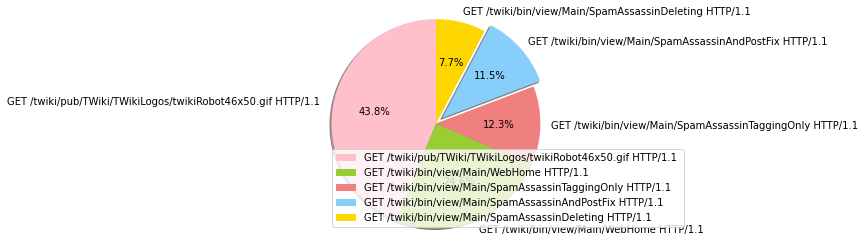

In [12]:
import matplotlib.pyplot as plt 

count=[]
for user in most_visited_pages:
    count.append(user)
visitors=['GET /twiki/pub/TWiki/TWikiLogos/twikiRobot46x50.gif HTTP/1.1 ','GET /twiki/bin/view/Main/WebHome HTTP/1.1 ','GET /twiki/bin/view/Main/SpamAssassinTaggingOnly HTTP/1.1 ','GET /twiki/bin/view/Main/SpamAssassinAndPostFix HTTP/1.1 ','GET /twiki/bin/view/Main/SpamAssassinDeleting HTTP/1.1'] 
colors = ['pink', 'yellowgreen', 'lightcoral', 'lightskyblue', 'gold'] 

plt.pie(count,labels = visitors, colors=colors, 
    startangle=90, shadow = True, explode = (0,0, 0, 0.1, 0), 
    radius = 1.2, autopct = '%1.1f%%') 
 
plt.legend() 
plt.show() 